# COMP1008 2023/24 Coursework - Prediction with Machine Learning

#### Student Name: [Samuel MAINE]
#### Student ID: [20566255]

## Task description

<b>Main task</b>: Choose <b>one</b> of the following datasets. Build a linear regression model and another machine learning model of your choice to conduct predictions on future new unseen data. Use approporate methods in pandas, matplotlib and sklearn libraries to analyse and process your dataset for building models for your chosen prediction task.
- Movies_Ratings: predict movie ratings
- Shared_Bike_Demand: predict bike sharing demand
- Forest_Fires_Area: predict areas of forest fires
- Obesity_Level: predict level of obesity

<b>Format</b>: Use this Jupyter Notebook file as a template to write your report in `Markdown` cells, supported by your appropriate source codes in `Code` cells which produce the corresponding plots or results answering the questions. Rename this .ipynb file `202324COMP1008cw-XXX.ipynb`, where XXX is your username (e.g. psxyz), and submit it to Moodle by <b><font color = "red">22 March, 3pm</font></b>.

<b>Marks</b>: In total 100 marks (count for 25% in COMP1008), awarded on the basis of understanding on machine learning theories, how informative and well presented your code, visualisations and results are (e.g. comment for code, necessary labels in plots), self-learning ability solving the specific problem, and succinct report writing.

Please check the detailed instructions at the end of this template file.

<div class="alert alert-success" style="text-align:left;">
<h2>Question 1. Prediction Model 1 - Linear Regression Model<span style="float:right;">[50 marks]</span></h2></div>

#### Question 1a <span style="color:red">(5 marks)</span> 
Briefly explain the characteristics of the dataset that make it suitable for regression analysis. Your justification should demonstrate your understanding of the linear regression model.

<b>Q1a Answer</b>: The characteristics shown by the data set which ive picked being Movie ratings shows numerous characteristics proving it a suitbale dataset, One of the characteristics are that the data consists of contionious variables which allow the data to take a wide range of numerical values which allows for meanigful analysis of the data and for accurate predictions when using regression. Further More, there are over 200 entries for the dataset allowing for a more accruate regression line due to a larger sample size resulting in accurate readings. As there are multiple variables for this regression we are going to have to make sure these variables are all independant of each other and allow for accurate predictions. As we are predicting a linear relationship between the catergories picked and the ratings given we expect to see a linear regression line using the linear equation to form our model. Beneath we have some of the imports used:


In [1]:
# Your code here. Add more cells as you need.
# import approporate libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt





#### Question 1b <span style="color:red">(15 marks)</span>
Use approporate methods in pandas and/or matplotlib libraries to analyse your dataset. Are there issues you observe in which part(s) of the data? What would happen if the data is not pre-processed properly?

<b>Q1b answer</b>: On observation upon the graph created below we can see that there is a weak positive correlation but due to scaling issues as seen from the scale in the below graph which we are using for income budget and views, we have got a huge cluster of items which havent been scaled properley. We can also see that there are many outliers within the data as we can see from the box plots and the graph which we can visually see the outliers from. This results in the data not being properly pre processed. when data isnt properley preproccesed we get irreglarity in outputs and also displacemet of data, Further more due to outliers data will be biased and can dramatically affect the regression line causing unfit predictions

Text(0, 0.5, 'Ratings')

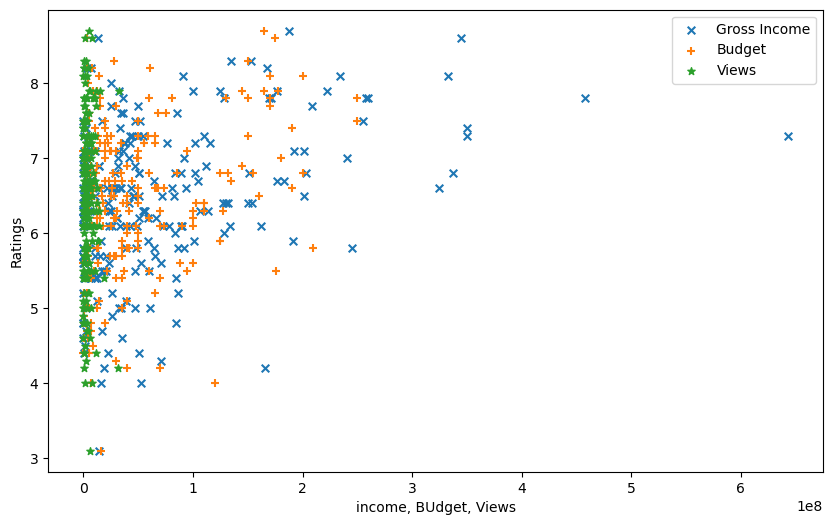

In [2]:
# Your code here
Movie_rat = pd.read_excel("Movie_Ratings.xlsx")


plt.figure(figsize=(10,6))
plt.scatter(x = Movie_rat['Gross_income'], y = Movie_rat['Ratings'], s=30, marker='x')
plt.scatter(x = Movie_rat['Budget'], y = Movie_rat['Ratings'], s=30, marker='+')
plt.scatter(x = Movie_rat['Views'], y = Movie_rat['Ratings'], s=30, marker='*')
plt.legend(['Gross Income', 'Budget', 'Views'])
plt.xlabel('income, BUdget, Views')
plt.ylabel('Ratings')
# Movie_rat.plot()


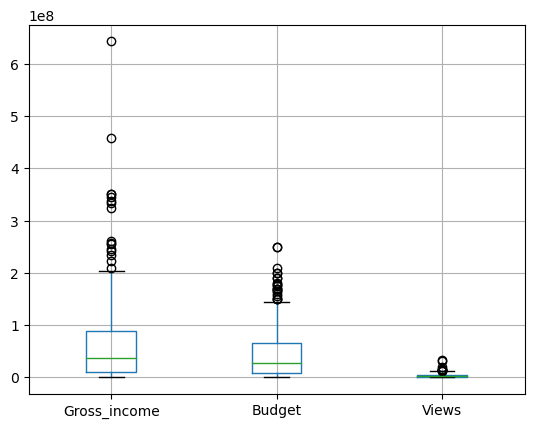

In [3]:
boxplot = Movie_rat.boxplot(column=['Gross_income','Budget','Views'])

#### Question 1c <span style="color:red">(20 marks)</span>
Use approporate methods to address the issues identified in <b>Q1b</b>.</span> Brielfy explain the methods and their parameters you used to address the issues.<br>

<b>Q1c answer</b>:  Below we have removed any N/A values allowing for the data set to only use rows and of data that have continious data within them to allow for a regression line to be built. As well as this, we have removed any outliers from the data using the above boxplots to filter out any outliers as seen in below box plots we no longer have any outliers within the data.Finally we have scalled the data down from very large different scales to 0 to 1. This allows the data to all be represented accurately and correctly as data can now be all viewed correctly due to correct scaling and can be used to compare and predict regression correctly.

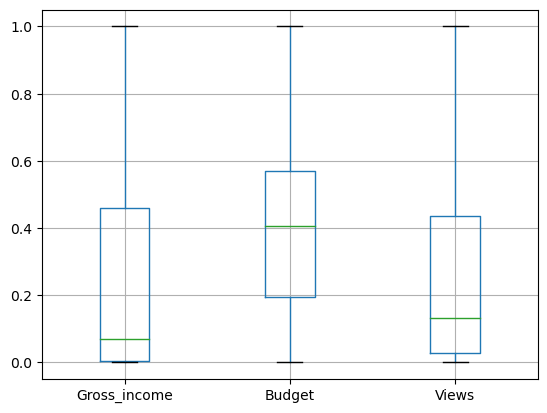

In [4]:
Movie_rat.dropna(subset=['Budget'], inplace=True)

Movie_rat_input = Movie_rat.drop(columns=['Year','index','Genre','Screens','Sequel_no','Sentiment','Likes','Dislikes','Comments','Actors_Followers','Movie'])
 # prepare the input data: three features
pd.options.display.float_format = '{:.5f}'.format


Movie_rat_input = Movie_rat_input.drop(Movie_rat_input[Movie_rat_input['Views'] > 7400000].index)
Movie_rat_input = Movie_rat_input.drop(Movie_rat_input[Movie_rat_input['Budget'] > 12500000].index)

Movie_rat_input = Movie_rat_input.drop(Movie_rat_input[Movie_rat_input['Gross_income'] > 47000000].index)

from sklearn import preprocessing

x = Movie_rat_input.values # returns a numpy array

min_max_scaler = preprocessing.MinMaxScaler() # create an scaler object
x_scaled = min_max_scaler.fit_transform(x) # normalise using the scaler
Movie_rat_input = pd.DataFrame(x_scaled, columns=Movie_rat_input.columns) # store back as a pandas Dataframe


boxplot = Movie_rat_input.boxplot(column=['Gross_income','Budget','Views'])

Movie_rat_new_input = Movie_rat_input.drop(columns = ['Ratings','Gross_income'])
Movie_rat_output = Movie_rat_input['Ratings']
Movie_rat_input = Movie_rat_input.drop(columns=['Ratings','Budget','Views'])





#### Question 1d <span style="color:red">(10 marks)</span>
Build and train a linear regression model. Print its weights and accuracy. Which is the most important feature and how to interpret its contribution to your prediction?   

The most important feature within this regression model is Gross Income which shows a weak positive correlation with rating as we can see via the points visually as the gross income of the films get higher so does the average rating within this film. We can also see due to the regression line that the overall prediction of all three categories gives us the weak positive regression line which proves there is some linear correlation to our prediction of as gross income, budget and views increase so does the average rating of the film. This is quite an obvious prediction and assumption to make as having more views and high amounts of money to make a film and a high return will usually give positive feedback for the said film as seen with our prediction and linear regression model.

<b>Q1d answer</b>: 

Coefficient/slope: [0.12801695]
Intercept: 0.5138020157872702
Accuracy =  0.0801608685393572


Text(0, 0.5, 'ratings')

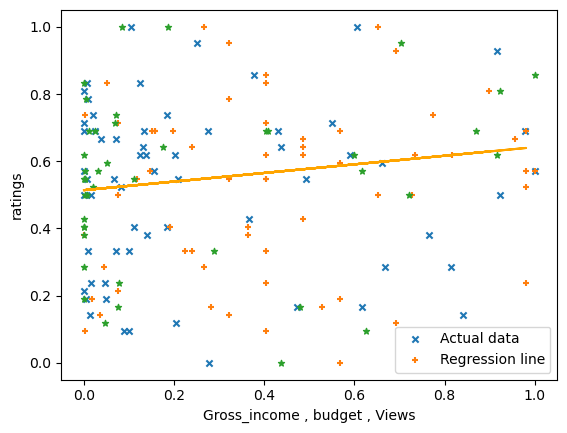

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(Movie_rat_input, Movie_rat_output, test_size = 0.3, random_state=1)

from sklearn.linear_model import LinearRegression
lr = LinearRegression() 
lr.fit(x_train, y_train) 

print('Coefficient/slope:',lr.coef_)
print('Intercept:',lr.intercept_)


from sklearn import metrics

y_pred = lr.predict(x_test)


print("Accuracy = ",metrics.mean_squared_error(y_test, y_pred))


plt.scatter(Movie_rat_new_input['Views'],Movie_rat_output, marker="x",s=20) # training data points
plt.scatter(Movie_rat_new_input['Budget'],Movie_rat_output, marker="+",s=20) 
plt.scatter(x_train,y_train, marker="*",s=20) 



plt.plot(x_test, y_pred, color='orange') # linear regression model
plt.legend(['Actual data','Regression line'])
plt.xlabel('Gross_income , budget , Views')
plt.ylabel('ratings')




<div class="alert alert-success" style="text-align:left;"><h2>Question 2. Prediction Model 2<span style="float:right;">[20 marks]</span></h2></div>

#### Question 2a <span style="color:red">(10 marks)</span>
For the same dataset, build a different machine learning model for your prediction task.<br>
Which model did you choose and why? What are the parameters of your Prediction Model 2?</span>

I chose to build an ANN for regression due to the data within Movie_ratings being continious we couldnt make a regular ANN, Therefor we cant make a visual diagram but this allows us to see how accurate of a prediction this model gives us, Further more we are using all the parameters within Movie_ratings to make a prediction as this will be able to give us the highest possible accurate reading possible. 

<b>Q2a answer</b>: 

In [6]:
# Your code here
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier

Movie_rat = pd.read_excel("Movie_Ratings.xlsx")


budget = Movie_rat['Budget'].mode()[0]
Movie_rat['Budget'] = Movie_rat['Budget'].fillna(budget)

Screens = Movie_rat['Screens'].mode()[0]
Movie_rat['Screens'] = Movie_rat['Screens'].fillna(Screens)

Ratings = Movie_rat['Ratings'].mode()[0]
Movie_rat['Ratings'] = Movie_rat['Ratings'].fillna(Ratings)

followers = Movie_rat['Actors_Followers'].mode()[0]
Movie_rat['Actors_Followers'] = Movie_rat['Actors_Followers'].fillna(followers)

seqel = Movie_rat['Sequel_no'].mode()[0]
Movie_rat['Sequel_no'] = Movie_rat['Sequel_no'].fillna(seqel)


d = Movie_rat['Ratings']
ind = d[d == d.max()].index
Movie_rat.loc[ind[0],'Ratings'] = Ratings

Movie_rat = pd.get_dummies(Movie_rat)


from sklearn.preprocessing import MinMaxScaler

norm = MinMaxScaler().fit(Movie_rat) # calculates the minimum and maximum values of the data
arr = norm.transform(Movie_rat) # transform/scale the data using the scaler to [0,1]
Movie_rat = pd.DataFrame(arr, columns=Movie_rat.columns) # create a dataframe from the scaled NumPy array
Movie_rat.describe()

input_movie = Movie_rat.drop(columns = ['Ratings'])
output_movie = Movie_rat['Ratings']
output_movie.head

X_train, X_test, y_train, y_test = train_test_split(input_movie, output_movie, test_size = 0.3, random_state=1)

from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(hidden_layer_sizes=(10,20), max_iter=8000, random_state=1) 
mlp.fit(X_train, y_train)
mlp_y_predict = mlp.predict(X_test) 
print('Testing accuracy: \t', metrics.mean_squared_error(y_test, mlp_y_predict))



#y = Movie_rat['is_canceled'] # the class labels
#X = Movie_rat.drop('is_canceled',axis=1) # the input features



Testing accuracy: 	 0.035384802822727275


#### Question 2b <span style="color:red">(10 marks)</span>
Evaluate the model you built. Explain if this model is better or worse than Prediction Model 1, and in which way.


This model being model 2 (The ANN) is far more accurate then model 1 being the (linear regression model). We can see this from the MSE values from both models and looking at model 1 we get an MSE of 0.0801 and looking at model 2 we get an MSE of 0.035 as we want out mean squared error as close to 0 as possible we can conclude that our model 2 is far more accurate than our model 1 as less predcition errors are occuring. We can also look at complexity for both models and see that the model 2 has a much more complex way of analysing data which has no correlation at all and can predict to a high standard as seen by the MSE value using a very large range of input data, where as the Model 1 uses a more stirct amount of data which needs to have some sort of linear relationship to build an accrate model and predict future data with a regression line.In this example we can also look at visually we can determine an answer much easier from model 1 but due to model 2s imports not allowing a visual representation with continious data we cant see a visual representation of the results leading to model one being more easy to understand and use. Overall the predictions created by model 2 are much more accurate and precise however due to a lack of visualsiation model 1 is better to visualise and use to interpret data and predict future results

<b>Q2b answer</b>: 

In [7]:
# Your code here



<div class="alert alert-success" style="text-align:left;"><h2>Question 3. Comparison and Improvement<span style="float:right;">[30 marks]</span></h2></div>

#### Question 3a <span style="color:red">(15 marks)</span>
Based on your Prediction Model 1, remove the least important feature and evaluate the performance of the linear regression model. In which way the feature removal impacts the model performance?

After removing the least important feature being Views the graph now has a slightly weaker but still continues a potisitve linear graph allowing us to see the affect that removing views has had on the graph. We can see that after removing views the accuracy has increased due to the lower MSE value. As the model is now only being based of 2 different variables where views can skew the results and prediction due to most of the lower viewings being quite highly rated and only a few high viewings having good ratings shows us that views wasnt very linear data to use and was negatively impacting the previous model on predictions causing a higher MSE value and giving a worse prediction rate.

<b>Q3a answer</b>:

Coefficient/slope: [0.04788039]
Intercept: 0.5212182684093793
Accuracy =  0.07086749495017088


Text(0, 0.5, 'ratings')

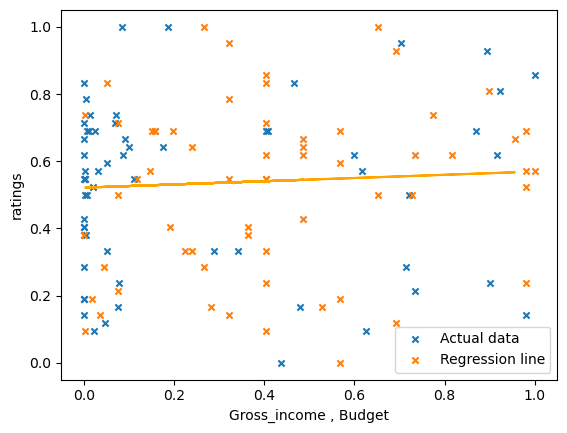

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Movie_rat = pd.read_excel("Movie_Ratings.xlsx")

Movie_rat.dropna(subset=['Budget'], inplace=True)

Movie_rat_input = Movie_rat.drop(columns=['Year','index','Genre','Screens','Sequel_no','Sentiment','Likes','Dislikes','Comments','Actors_Followers','Movie'])
 # prepare the input data: three features
pd.options.display.float_format = '{:.5f}'.format


Movie_rat_input = Movie_rat_input.drop(Movie_rat_input[Movie_rat_input['Views'] > 7400000].index)
Movie_rat_input = Movie_rat_input.drop(Movie_rat_input[Movie_rat_input['Budget'] > 12500000].index)

Movie_rat_input = Movie_rat_input.drop(Movie_rat_input[Movie_rat_input['Gross_income'] > 47000000].index)

from sklearn import preprocessing

x = Movie_rat_input.values # returns a numpy array

min_max_scaler = preprocessing.MinMaxScaler() # create an scaler object
x_scaled = min_max_scaler.fit_transform(x) # normalise using the scaler
Movie_rat_input = pd.DataFrame(x_scaled, columns=Movie_rat_input.columns) # store back as a pandas Dataframe

Movie_rat_new_input = Movie_rat_input.drop(columns = ['Ratings'])
Movie_rat_output = Movie_rat_input['Ratings']
Movie_rat_input = Movie_rat_input.drop(columns=['Ratings','Views','Gross_income'])
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(Movie_rat_input, Movie_rat_output, test_size = 0.3, random_state=1)

from sklearn.linear_model import LinearRegression
lr = LinearRegression() 
lr.fit(x_train, y_train) 

print('Coefficient/slope:',lr.coef_)
print('Intercept:',lr.intercept_)


from sklearn import metrics

y_pred = lr.predict(x_test)


print("Accuracy = ",metrics.mean_squared_error(y_test, y_pred))

plt.scatter(Movie_rat_new_input['Gross_income'],Movie_rat_output, marker="x",s=20) 
plt.scatter(Movie_rat_new_input['Budget'],Movie_rat_output, marker="x",s=20) 
#plt.scatter(x_train,y_train, marker="*",s=20) 

plt.plot(x_test , y_pred, color='orange')

plt.legend(['Actual data','Regression line'])
plt.xlabel('Gross_income , Budget')
plt.ylabel('ratings')


#### Question 3b <span style="color:red">(15 marks)</span>
By referring to your above relevant observations, what would you suggest to do in the future to build better models for predicting on new data instances? Why?<br>
<b>Hint</b>: based on relevant analysis, feature selection, feature scaling and data processing (e.g. resolve imbalanced samples, errors and outliers, etc.) could all potentially improve the model by reducing training time, fixing overfitting and improving interpretability, etc. You can also explore external resources for other potential approaches or techniques.<br>
<b>Note</b>: Coding is optional here, but your answers should be supported by relevant analysis or justifications.


For future models when pre processing training and predicting, we should always have some feature selection which invloves going through data we've been given to analyse and look at distributions of the data to see for example using box plots to see outliers and data which isnt correct so when we pre process we are able to have identified issues already and are able to remove these before training our data. Further more we should also look at if data is relevant to the objective we are trying to prove and whether in examples if data that correlates actually has any causation which can be decieving. Using different techniques of being able to visually look at graphed data and doing extensive research behind categories allows you to usually tell if data is causation aswell as correltaion. Making sure that we have enough data to conduct and create model such as the above is also a veyr important step that we need to ensure is correct. Having too little data causes there to be too little information to be able to fully conclude and justify predictions made as the sample set is just too small causing the small set used to create a bias prediction without taking into account that the sample set could be skewed data. Scaling is also a very important feature to make sure we pick the right scaling technique between min max scaling or z-score normalsation which dramatically improve several different algorithms used to predict data such as within ANN there is gradient based optimsiation which greatly benefits from scaling data properly. As well as that, having data scaled properly allows us to view many different categories which may have different sizes amongst the same graph and make plausible deductions from the graph allowing accurate predictions and understanding due to visually having data all represetend amongst the same scales. Data processing and picking the correct model is equally just as important due to wanting to see the model visually and understand what it is doing and prediciting is an extremley vital and important feature as we want accuracy and high level predictions which can be very complicated procedures and we need to make sure these are understood by the users and people trying to make the predcitions so using a model that isnt suitable for certain kinds of evalutaions is extremely important and vital.

<b>Q3b answer</b>:

## Appendix. Coursework Instructions

<b>Coursework Support</b>:
- COM1008 computing tutorials and exercises on data processing and machine learning models on different example problems
- Example code building and analysing machine learning models in COMP1008 lectures slides on 'Machine learning'
- In the computing sessions, Q&A support for developing .ipynb projects
- In Teams channel 'COMP1008 2023/24 / Questions': support of common questions

<b>Marks</b>: in total 100 marks (count for 25% in COMP1008), awarded on the basis of:
- knowledge and understanding on the theories covered in lectures when answering the questions in the Jupyter Notebook report
- how informative and well presented your code, visualisations and results are (e.g. necessary labels in plots)
- self-learning ability making use of tutorial materials and online resources
- problem solving skills to obtain the answers and results for the specific dataset
- concise report with key details, e.g. parameters, data, etc. for others to repeat your methods and obtain the same results.

For more information of COMP1008 assessment please refer to the coursework issue <a href="https://moodle.nottingham.ac.uk/pluginfile.php/9528816/mod_label/intro/COMP1008_assessment_sheet.pdf?time=1707914843647">form</a> in Moodle ('Course Content / Assessment').

<b>Format</b>:
- One single .ipynb file named 202324COMP1008cw-XXX.ipynb, where XXX is your username (e.g. psxyz)
- The .ipynb file should include your code and answers, using this given .ipynb template (please add cells as needed)
- You could use additional Python libraries as you wish, in addition to the ones demonstrated in the computing sessions
- There are multiple ways using different methods to complete the tasks. These are fine as long as all answers and analysis are supported by the code implemented in Jupyter Notebook, not by using other means (e.g. operations in Excel, or by using other languages, etc.).

<b>Submission</b>: 
- Deadline: 22nd March 2024 3pm
- Late submission leads to a 5% deduction of the coursework on each weekday. Work submitted one week late will receive a 0 for the coursework.
- Method: in Moodle submit a single .ipynb file named 202324COMP1008cw-XXX.ipynb
- If you can’t submit your coursework on time due to ECs, please contact Student Services and your personal tutor ASAP

<b>Note: Plagiarism vs. Group Discussions</b> 

As you should know, plagiarism is completely unacceptable and will be dealt with according to University's standard policies.<br>
Students are encouraged to have only general discussions on the theory (not the specific questions) when completing the coursework.<br>
It is important that when you actually do your coursework and write the answers, you do it individually.<br>
Do NOT, under any circumstances, share your report, code or figures, etc. with anyone else.